In [20]:
import torch
import torch
from torchvision import datasets, transforms
import numpy as np
import os
from collections import defaultdict
from torch.utils.data import Subset
from torchvision import datasets
import random
from collections import Counter
import matplotlib.pyplot as plt

In [13]:
svhn = datasets.SVHN(root='./data', split='train', download=True)

In [14]:
with open("selected_svhn_indices_150.txt", "r") as f:
    selected_indices = [int(line.strip()) for line in f]

In [15]:
# Shuffle to avoid class ordering
random.shuffle(selected_indices)

# Build balanced subset
target_per_class = 150
class_limits = defaultdict(int)
balanced_indices = []

for idx in selected_indices:
    label = svhn[idx][1]
    if class_limits[label] < target_per_class:
        balanced_indices.append(idx)
        class_limits[label] += 1
    # Stop early if all classes are done
    if all(class_limits[d] >= target_per_class for d in range(10)):
        break

print(f"Total balanced samples: {len(balanced_indices)}")

# Create the subset
balanced_subset = Subset(svhn, balanced_indices)

Total balanced samples: 1500


Class distribution:
Digit 0: 150
Digit 1: 150
Digit 2: 150
Digit 3: 150
Digit 4: 150
Digit 5: 150
Digit 6: 150
Digit 7: 150
Digit 8: 150
Digit 9: 150


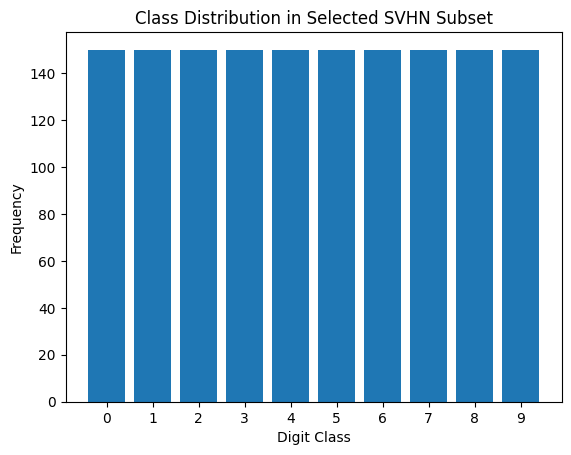

In [17]:
# Extract labels from selected subset
labels = [svhn[i][1] for i in balanced_indices]

# Count frequency of each label
label_counts = Counter(labels)

# Print counts
print("Class distribution:")
for label in sorted(label_counts.keys()):
    print(f"Digit {label}: {label_counts[label]}")

# Plot the distribution
plt.bar(label_counts.keys(), label_counts.values())
plt.xticks(range(10))
plt.xlabel("Digit Class")
plt.ylabel("Frequency")
plt.title("Class Distribution in Selected SVHN Subset")
plt.show()

In [18]:
#save the balanced indices to a file
output_file = "balanced_svhn_indices_150.txt"
with open(output_file, "w") as f:
    for idx in balanced_indices:
        f.write(f"{idx}\n")

### Create Train-Val-Test split

In [31]:
with open("balanced_svhn_indices_150.txt", "r") as f:
    balanced_indices = [int(line.strip()) for line in f]

In [36]:
# Group indices by class
class_to_indices = defaultdict(list)

for idx in balanced_indices:
    label = svhn[idx][1]
    class_to_indices[label].append(idx)

# Shuffle each class
for label in class_to_indices:
    random.shuffle(class_to_indices[label])

# Split
train_indices = []
val_indices = []
test_indices = []

for label in range(10):
    indices = class_to_indices[label]
    train_indices += indices[:100]
    val_indices += indices[100:120]
    test_indices += indices[120:150]

print(f"Train: {len(train_indices)}")
print(f"Val:   {len(val_indices)}")
print(f"Test:  {len(test_indices)}")


Train: 1000
Val:   200
Test:  300


In [39]:
with open("train_balanced_indices.txt", "w") as f:
    for idx in train_indices:
        f.write(f"{idx}\n")

with open("val_balanced_indices.txt", "w") as f:
    for idx in val_indices:
        f.write(f"{idx}\n")

with open("test_balanced_indices.txt", "w") as f:
    for idx in test_indices:
        f.write(f"{idx}\n")

In [40]:
from torch.utils.data import Subset

train_subset = Subset(svhn, train_indices)
val_subset   = Subset(svhn, val_indices)
test_subset  = Subset(svhn, test_indices)
